Implementing **Naive Bayes** on Diabetes and Iris dataset

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
# for confusion matrix

def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap = plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Diabetes

In [3]:
data = pd.read_csv(r"E:\Jupyterfiles\ML_practice\Diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

## Statistical summary

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
X = data.drop("Outcome", axis = 1)
Y = data[["Outcome"]]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [8]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_predict = nb.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Confusion matrix

Confusion matrix, without normalization
[[138  19]
 [ 36  38]]


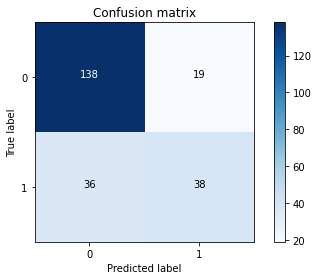

In [9]:
nb_cm = confusion_matrix(Y_test, nb_predict)

plot_confusion_matrix(nb_cm, [0, 1])
plt.show()

## Evaluation metrics

1. Accuracy score
2. Precision
3. Recall

In [10]:
print('Accuracy score: ', accuracy_score(Y_test, nb_predict))
print('Precision score: ', precision_score(Y_test, nb_predict))
print('Recall score: ', recall_score(Y_test, nb_predict))

Accuracy score:  0.7619047619047619
Precision score:  0.6666666666666666
Recall score:  0.5135135135135135


# Iris

In [11]:
dataset = datasets.load_iris()

In [12]:
model = GaussianNB()
model.fit(dataset.data, dataset.target)
print(model)

GaussianNB()


In [13]:
expected = dataset.target
predicted = model.predict(dataset.data)

## Confusion matrix

Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


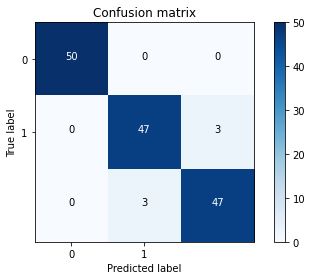

In [14]:
model_cm = confusion_matrix(expected, predicted)

plot_confusion_matrix(model_cm, [0, 1])
plt.show()

## Evaluation metrics

In [15]:
print('Accuracy score: ', accuracy_score(expected, predicted))
print(classification_report(expected, predicted))

Accuracy score:  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

